In [ ]:
import pandas as pd

# Load the dataset (Replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('/content/Dataset .csv')

# Display the first few rows
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Removes extra spaces
df.rename(columns={'Location': 'City', 'Review Score': 'Rating'}, inplace=True)  # Adjust column names


In [ ]:
# Count restaurants per city
city_counts = df['City'].value_counts()

# Find the city with the most restaurants
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

print(f"The city with the highest number of restaurants is: {top_city} with {top_city_count} restaurants.")


The city with the highest number of restaurants is: New Delhi with 5473 restaurants.


In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Convert to numeric
df['Rating'].fillna(df['Rating'].mean(), inplace=True)  # Replace NaN with mean rating


KeyError: 'Rating'

In [ ]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Remove extra spaces
df.rename(columns={'Review Score': 'Rating', 'Average Rating': 'Rating'}, inplace=True)  # Adjust names


In [ ]:
# Count number of restaurants per city
city_counts = df['City'].value_counts()

# Get the city with the most restaurants
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

print(f"The city with the most restaurants is: {top_city} ({top_city_count} restaurants).")


The city with the most restaurants is: New Delhi (5473 restaurants).


In [ ]:
# Convert 'Aggregate rating' to numeric (just in case)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Fill missing ratings with the average
df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)

# Compute average rating per city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Display top 10 cities by rating
print(city_avg_rating.head(10))


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


<ipython-input-12-302ab7495162>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)


In [ ]:
# Find the city with the highest average rating
best_rated_city = city_avg_rating.idxmax()
best_avg_rating = city_avg_rating.max()

print(f"The city with the highest average rating is: {best_rated_city} with an average rating of {best_avg_rating:.2f}.")


The city with the highest average rating is: Inner City with an average rating of 4.90.


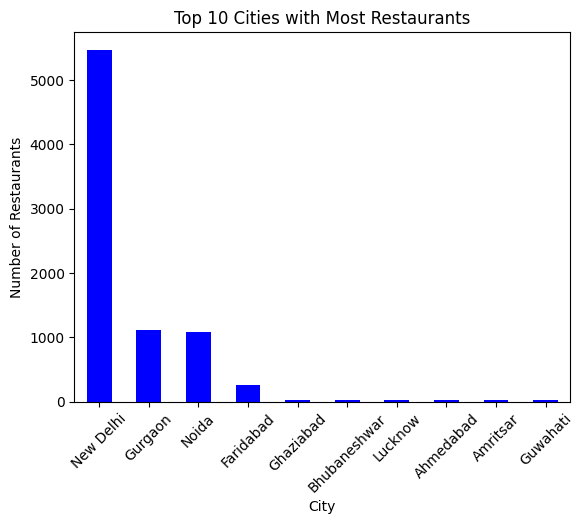

In [ ]:
import matplotlib.pyplot as plt

# Plot top 10 cities with most restaurants
city_counts.head(10).plot(kind='bar', color='blue')

plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cities with Most Restaurants')
plt.xticks(rotation=45)
plt.show()


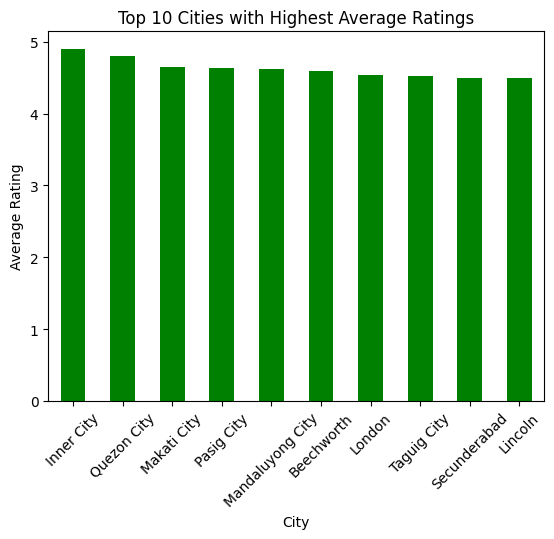

In [ ]:
# Plot top 10 cities by rating
city_avg_rating.head(10).plot(kind='bar', color='green')

plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Top 10 Cities with Highest Average Ratings')
plt.xticks(rotation=45)
plt.show()
